In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# show more colums
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [36]:
df = pd.read_csv("../data/LGA_Flights_Departure.csv")
df.head(10)

,FlightDate,DepDelay,Distance,CRSDepTime,CRSElapsedTime,CRSArrTime,DayOfWeek,Year,Month,AverageDelayPerFlightNumber,AverageDelayPerDistanceGroup,AverageDelayPerAircraft,Dest_ALB,Dest_ATL,Dest_BNA,Dest_BOS,Dest_BUF,Dest_BZN,Dest_CHS,Dest_CLT,Dest_CMH,Dest_CVG,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DTW,Dest_FLL,Dest_GSP,Dest_IAH,Dest_JAX,Dest_MCO,Dest_MHT,Dest_MIA,Dest_MSN,Dest_MSP,Dest_MSY,Dest_MYR,Dest_OMA,Dest_ORD,Dest_ORF,Dest_PBI,Dest_PWM,Dest_RDU,Dest_RIC,Dest_RSW,Dest_SDF,Dest_SRQ,Dest_STL,Dest_TPA,Dest_TVC
0,2018-01-01,-2.0,762.0,479.0,75.0,394,1,2018,1,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,-5.0,1076.0,1245.0,117.0,2,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,23.0,1076.0,1110.0,84.0,794,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,-6.0,1076.0,895.0,118.0,693,1,2018,1,0.0,11.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,-1.0,950.0,839.0,95.0,614,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2018-01-01,9.0,1020.0,693.0,117.0,510,1,2018,1,0.0,7.666667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2018-01-01,-3.0,1010.0,420.0,105.0,365,1,2018,1,0.0,8.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,2018-01-01,7.0,762.0,1140.0,95.0,795,1,2018,1,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2018-01-01,-3.0,1076.0,780.0,83.0,623,1,2018,1,0.0,6.400000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2018-01-01,-3.0,1010.0,505.0,114.0,459,1,2018,1,0.0,5.333333,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='CRSDepTime', ylabel='Density'>

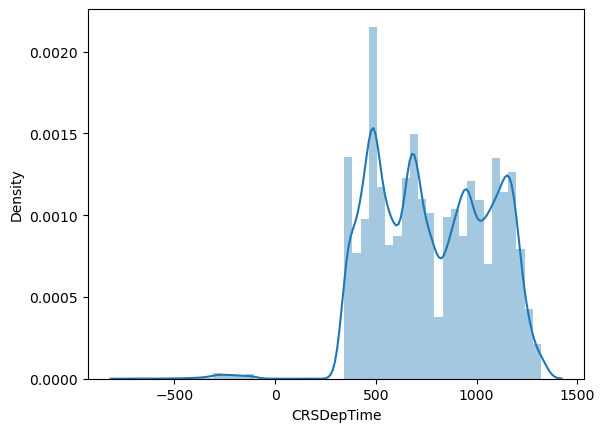

In [42]:
# plot CRSArrTime
sns.distplot(df['CRSDepTime'])

In [17]:
df_train = df[df["FlightDate"] < "2019-10-01"]
df_test = df[df["FlightDate"] >= "2019-10-01"]

# drop FlightDate
df_train = df_train.drop("FlightDate", axis=1)
df_test = df_test.drop("FlightDate", axis=1)

# drop CRSDepTime
# df_train = df_train.drop("CRSDepTime", axis=1)
# df_test = df_test.drop("CRSDepTime", axis=1)

# Get the arrays
X_train, y_train = df_train.drop("DepDelay", axis=1), df_train["DepDelay"]
X_test, y_test = df_test.drop("DepDelay", axis=1), df_test["DepDelay"]

# BASELINE

In [35]:
y_pred = np.full(len(y_test), y_train.mean())
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Root Mean squared error: 42.99
Mean absolute error: 23.68


# Linear Regression

In [18]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root Mean squared error: 150727505.26
Mean absolute error: 5279859.11
Coefficient of determination: -12532611608642.29


# Random Forest

In [26]:
# Create a random forest
rf = RandomForestRegressor(n_estimators=200, random_state=1601)

# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1601)

Root Mean Squared Error: 38.58
Mean absolute error: 24.44
Coefficient of determination: 0.18


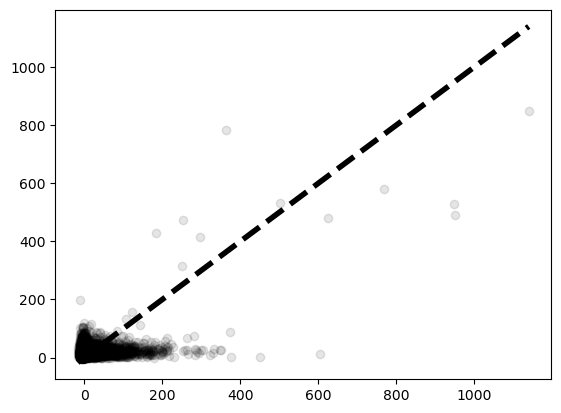

In [27]:
# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

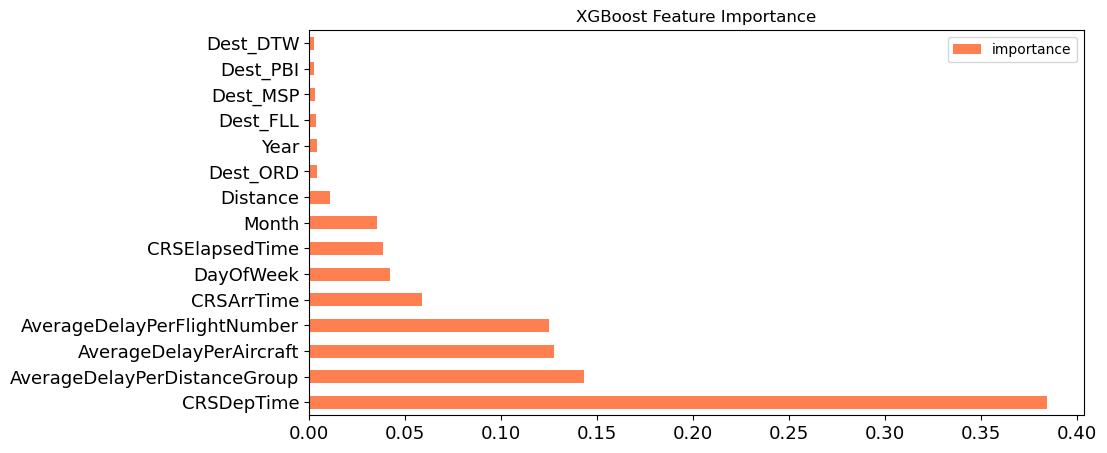

In [28]:
## feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:15]

feature_importance.plot(
    kind="barh",
    figsize=(10, 5),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

# XGBoost

In [22]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=1601)

# Train the model using the training sets
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1601,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Root Mean squared error: 43.68
Mean absolute error: 25.73
Coefficient of determination: -0.05


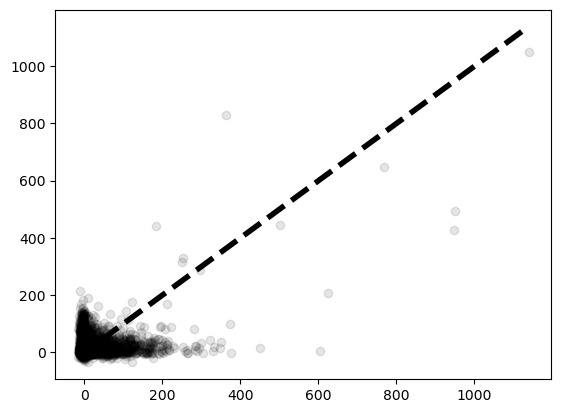

In [23]:
# Make predictions using the testing set
y_pred = xgb.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

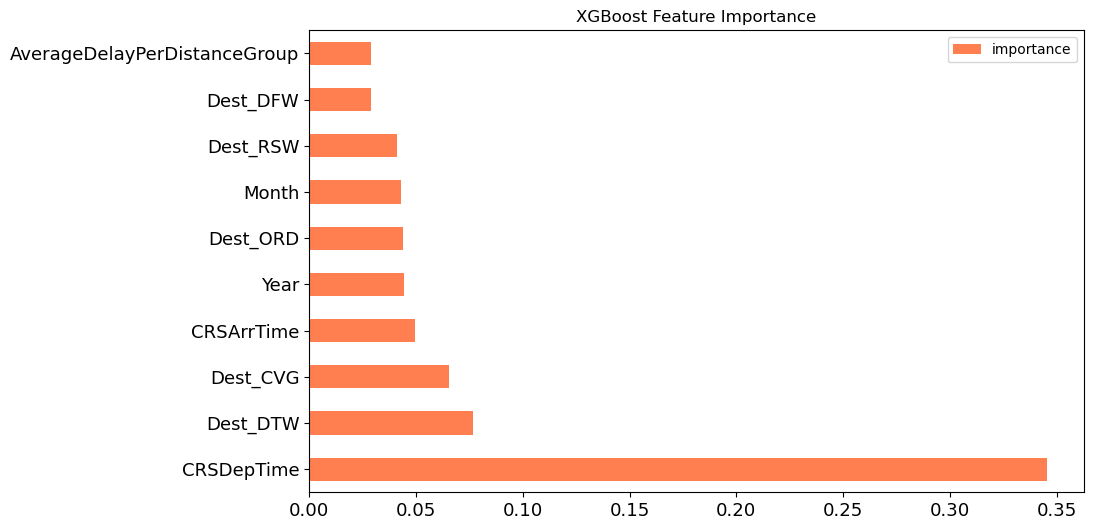

In [24]:
## feature importance
feature_importance = pd.DataFrame(
    xgb.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:10]

feature_importance.plot(
    kind="barh",
    figsize=(10, 6),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

<AxesSubplot:>

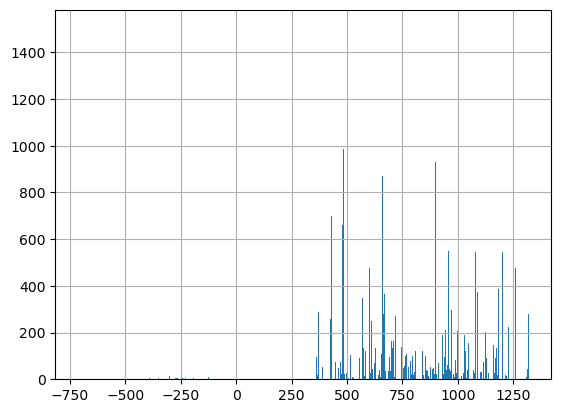

In [25]:
# pplot the CRSArrTime
df["CRSDepTime"].hist(bins=1000)